<a href="https://colab.research.google.com/github/ShafizurRahman/PrivacyLab/blob/main/LoationPrivacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#importing modules

import pandas as pd
import numpy as np
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


from sklearn.compose import make_column_transformer, make_column_selector




In [15]:
#loading the data

column_names=["deviceID", "date", "longitude", "latitude", "altitude", "accelerometer x", "accelerometer y", "accelerometer z", "userAccelerometer x", "userAccelerometer y", "userAccelerometer z", "gyroscope x", "gyroscope y", "gyroscope z", "magnetometer x", "magnetometer y", "magnetometer z"]

data=pd.read_csv('testing10.csv', names=column_names) #initialiaze data path



In [16]:
#check if any attributes have NAN values. If not, proceed.
data.isnull().sum(axis = 0)


deviceID               0
date                   0
longitude              0
latitude               0
altitude               0
accelerometer x        0
accelerometer y        0
accelerometer z        0
userAccelerometer x    0
userAccelerometer y    0
userAccelerometer z    0
gyroscope x            0
gyroscope y            0
gyroscope z            0
magnetometer x         0
magnetometer y         0
magnetometer z         0
dtype: int64

In [17]:
#delete unnecessary attributes

del data['deviceID']
del data['date']

In [18]:
data.head()

,longitude,latitude,altitude,accelerometer x,accelerometer y,accelerometer z,userAccelerometer x,userAccelerometer y,userAccelerometer z,gyroscope x,gyroscope y,gyroscope z,magnetometer x,magnetometer y,magnetometer z
0,-96.489076,32.769303,98.336346,-7.223932,1.667797,-6.491728,0.957092,-0.075251,-1.480100,-0.007101,-0.010690,0.003894,94.968750,-301.537506,433.462524
1,-96.489076,32.769303,98.336346,-7.223932,1.667797,-6.491728,0.957092,-0.075251,-1.480100,-0.007101,-0.010690,0.003894,94.968750,-301.537506,433.462524
2,-96.489076,32.769303,98.336346,-7.223932,1.667797,-6.491728,0.957092,-0.075251,-1.480100,-0.007101,-0.010690,0.003894,94.968750,-301.537506,433.462524
3,-96.489076,32.769303,98.336346,-7.223932,1.667797,-6.491728,0.957092,-0.075251,-1.480100,-0.007101,-0.010690,0.003894,94.968750,-301.537506,433.462524
4,-96.489114,32.769276,98.154233,-7.688139,0.236889,-6.357730,0.061044,-0.097244,-0.178144,-0.070479,0.016035,-0.075136,95.100006,-301.162506,432.600006


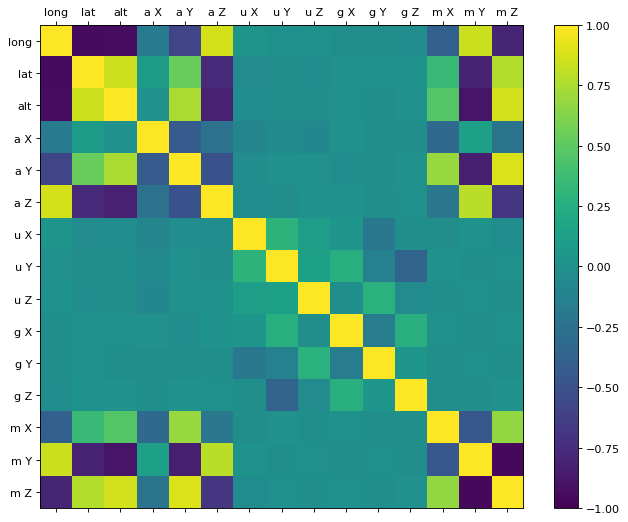

In [19]:
names=['long','lat','alt','a X', 'a Y', 'a Z','u X','u Y','u Z' ,'g X', 'g Y', 'g Z', 'm X','m Y','m Z']
correlations = data.corr()
fig = pyplot.figure(figsize=(10, 8), dpi=80)

ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [20]:
# First Model Random Forest

# Input sensor data= ["accelerometer x", "accelerometer y", "accelerometer z", "userAccelerometer x", "userAccelerometer y", 
#                      "userAccelerometer z", "gyroscope x", "gyroscope y", "gyroscope z", "magnetometer x", "magnetometer y",
#                       "magnetometer z"]

# Output Location Parameters =[Longitude, Latitude, Altitude]

# Data pipeline

df=data.copy()

#seperating output parameters
y1=df.longitude
y2=df.latitude
y3=df.altitude
df.drop(['longitude'], axis=1, inplace=True)
df.drop(['latitude'], axis=1, inplace=True)
df.drop(['altitude'], axis=1, inplace=True)


#seperate models for Longitude(y1), Latitude(y2), Altitude(y3); splitting training and testing data

#Longitude
X1_train, X1_test, y1_train, y1_test = train_test_split(df, y1, train_size=0.8, test_size=0.2,
                                                                random_state=0)
#Latitude
X2_train, X2_test, y2_train, y2_test = train_test_split(df, y2, train_size=0.8, test_size=0.2,
                                                                random_state=0)
#Altitude
X3_train, X3_test, y3_train, y3_test = train_test_split(df, y3, train_size=0.8, test_size=0.2,
                                                                random_state=0)


#RandomForestRegressor



# Train the model
rfr1 = RandomForestRegressor(n_estimators=24, random_state=0) #n_estimatimators is tunable parameter
rfr2 = RandomForestRegressor(n_estimators=24, random_state=0)
#rfr3 = RandomForestRegressor(n_estimators=10, random_state=0)

rfr1.fit(X1_train, y1_train)  #longitude
rfr2.fit(X2_train, y2_train)  #latitude 
#rfr3.fit(X3_train, y3_train)  #altitude 


# Predict on the test set
pred1 = rfr1.predict(X1_test)  #longitude
pred2 = rfr2.predict(X2_test)   #latitude
#pred3 = rfr3.predict(X3_test)   #altitude


# Evaluate the model using mean squared error
mse1 = mean_squared_error(pred1, y1_test) 
mse2 = mean_squared_error(pred2, y2_test)
#mse3 = mean_squared_error(pred3, y3_test)


In [21]:
print("RANDOM FOREST")

print("Input: accelerometer x, accelerometer y, accelerometer z, userAccelerometer x, userAccelerometer y, userAccelerometer z, gyroscope x, gyroscope y, gyroscope z, magnetometer x, magnetometer y,magnetometer z ")
print("Output: Longitude, Latitude, Altitude")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")


print("Longitude Mean Sqaured Error:" , mse1)
print("Latitude Mean Squared Error:" , mse2)
#print("Altitude Mean Sqaured Error:" , mse3)
print("##################################################")


RANDOM FOREST
Input: accelerometer x, accelerometer y, accelerometer z, userAccelerometer x, userAccelerometer y, userAccelerometer z, gyroscope x, gyroscope y, gyroscope z, magnetometer x, magnetometer y,magnetometer z 
Output: Longitude, Latitude, Altitude
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Longitude Mean Sqaured Error: 0.0004138704568385642
Latitude Mean Squared Error: 0.0001697640883242688
##################################################


In [22]:
#Second Random Forest Model




# input Location Parameters =[Longitude, Latitude, Altitude]
# output accelerometer x, accelerometer y, accelerometer z

# Data pipeline

df=data.copy()

#delete other attributes apart from input and output attributes
del df['userAccelerometer x']
del df['userAccelerometer y']
del df['userAccelerometer z']
del df['gyroscope x']
del df['gyroscope y']
del df['gyroscope z']
del df['magnetometer x']
del df['magnetometer y']
del df['magnetometer z']

#seperating output parameters
y1=df['accelerometer x']
y2=df['accelerometer y']
y3=df['accelerometer z']

df.drop(['accelerometer x'], axis=1, inplace=True)
df.drop(['accelerometer y'], axis=1, inplace=True)
df.drop(['accelerometer z'], axis=1, inplace=True)


#seperate models for accelerometer x(y1), accelerometer y(y2), accelerometer z(y3); splitting training and testing data

#Accelerometer x
X1_train, X1_test, y1_train, y1_test = train_test_split(df, y1, train_size=0.8, test_size=0.2,
                                                                random_state=0)
#Accelerometer y
X2_train, X2_test, y2_train, y2_test = train_test_split(df, y2, train_size=0.8, test_size=0.2,
                                                                random_state=0)
#Accelerometer z
X3_train, X3_test, y3_train, y3_test = train_test_split(df, y3, train_size=0.8, test_size=0.2,
                                                                random_state=0)


#RandomForestRegressor



# Train the model
rfr1 = RandomForestRegressor(n_estimators=10, random_state=0)
rfr2 = RandomForestRegressor(n_estimators=10, random_state=0)
rfr3 = RandomForestRegressor(n_estimators=10, random_state=0)

rfr1.fit(X1_train, y1_train)
rfr2.fit(X2_train, y2_train)
rfr3.fit(X3_train, y3_train)


# Predict on the test set
pred1 = rfr1.predict(X1_test)
pred2 = rfr2.predict(X2_test)
pred3 = rfr3.predict(X3_test)


# Evaluate the model using mean squared error
mse1 = mean_squared_error(pred1, y1_test)
mse2 = mean_squared_error(pred2, y2_test)
mse3 = mean_squared_error(pred3, y3_test)


print("##################################################")
print("RANDOM FOREST")

print("Input: Longitude, Latitude, Altitude")
print("Output: accelerometer x, accelerometer y, accelerometer z")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

print("Mean Sqaured Error:" , mse1)
print("Mean Squared Error:" , mse2)
print("Mean Sqaured Error:" , mse3)
print("##################################################")

##################################################
RANDOM FOREST
Input: Longitude, Latitude, Altitude
Output: accelerometer x, accelerometer y, accelerometer z
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Mean Sqaured Error: 0.023407822422955964
Mean Squared Error: 0.010114762877907602
Mean Sqaured Error: 0.01900835654211623
##################################################


In [23]:
#Third Random Forest Model



# input accelerometer x, accelerometer y, accelerometer z

# output Location Parameters =[Longitude, Latitude, Altitude]

# Data pipeline

df=data.copy()

#delete other attributes apart from input and output attributes
del df['userAccelerometer x']
del df['userAccelerometer y']
del df['userAccelerometer z']
del df['gyroscope x']
del df['gyroscope y']
del df['gyroscope z']
del df['magnetometer x']
del df['magnetometer y']
del df['magnetometer z']

#seperating output parameters
y1=df['longitude']
y2=df['latitude']
y3=df['altitude']

df.drop(['longitude'], axis=1, inplace=True)
df.drop(['latitude'], axis=1, inplace=True)
df.drop(['altitude'], axis=1, inplace=True)


#seperate models for accelerometer x(y1), accelerometer y(y2), accelerometer z(y3); splitting training and testing data

#Accelerometer x
X1_train, X1_test, y1_train, y1_test = train_test_split(df, y1, train_size=0.8, test_size=0.2,
                                                                random_state=0)
#Accelerometer y
X2_train, X2_test, y2_train, y2_test = train_test_split(df, y2, train_size=0.8, test_size=0.2,
                                                                random_state=0)
#Accelerometer z
X3_train, X3_test, y3_train, y3_test = train_test_split(df, y3, train_size=0.8, test_size=0.2,
                                                                random_state=0)


#RandomForestRegressor



# Train the model
rfr1 = RandomForestRegressor(n_estimators=10, random_state=0)
rfr2 = RandomForestRegressor(n_estimators=10, random_state=0)
rfr3 = RandomForestRegressor(n_estimators=10, random_state=0)

rfr1.fit(X1_train, y1_train)
rfr2.fit(X2_train, y2_train)
rfr3.fit(X3_train, y3_train)


# Predict on the test set
pred1 = rfr1.predict(X1_test)
pred2 = rfr2.predict(X2_test)
pred3 = rfr3.predict(X3_test)


# Evaluate the model using mean squared error
mse1 = mean_squared_error(pred1, y1_test)
mse2 = mean_squared_error(pred2, y2_test)
mse3 = mean_squared_error(pred3, y3_test)


print("##################################################")
print("RANDOM FOREST")

print("Input:accelerometer x, accelerometer y, accelerometer z ")
print("Output: Longitude, Latitude, Altitude")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

print("Mean Sqaured Error:" , mse1)
print("Mean Squared Error:" , mse2)
print("Mean Sqaured Error:" , mse3)
print("##################################################")

##################################################
RANDOM FOREST
Input:accelerometer x, accelerometer y, accelerometer z 
Output: Longitude, Latitude, Altitude
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Mean Sqaured Error: 0.020606278347635634
Mean Squared Error: 0.007808019346766448
Mean Sqaured Error: 17.32598918247229
##################################################


In [24]:
#Fourth Random Forest Model



# input magnetometer x, magnetometer y, magnetometer z

# output Location Parameters =[Longitude, Latitude, Altitude]

# Data pipeline

df=data.copy()

#delete other attributes apart from input and output attributes
del df['userAccelerometer x']
del df['userAccelerometer y']
del df['userAccelerometer z']
del df['gyroscope x']
del df['gyroscope y']
del df['gyroscope z']
del df['accelerometer x']
del df['accelerometer y']
del df['accelerometer z']

#seperating output parameters
y1=df['longitude']
y2=df['latitude']
y3=df['altitude']

df.drop(['longitude'], axis=1, inplace=True)
df.drop(['latitude'], axis=1, inplace=True)
df.drop(['altitude'], axis=1, inplace=True)


#seperate models for magnetometer x(y1), agnetometer y(y2), magnetometer z(y3); splitting training and testing data

#Accelerometer x
X1_train, X1_test, y1_train, y1_test = train_test_split(df, y1, train_size=0.8, test_size=0.2,
                                                                random_state=0)
#Accelerometer y
X2_train, X2_test, y2_train, y2_test = train_test_split(df, y2, train_size=0.8, test_size=0.2,
                                                                random_state=0)
#Accelerometer z
X3_train, X3_test, y3_train, y3_test = train_test_split(df, y3, train_size=0.8, test_size=0.2,
                                                                random_state=0)


#RandomForestRegressor



# Train the model
rfr1 = RandomForestRegressor(n_estimators=10, random_state=0)
rfr2 = RandomForestRegressor(n_estimators=10, random_state=0)
rfr3 = RandomForestRegressor(n_estimators=10, random_state=0)

rfr1.fit(X1_train, y1_train)
rfr2.fit(X2_train, y2_train)
rfr3.fit(X3_train, y3_train)


# Predict on the test set
pred1 = rfr1.predict(X1_test)
pred2 = rfr2.predict(X2_test)
pred3 = rfr3.predict(X3_test)


# Evaluate the model using mean squared error
mse1 = mean_squared_error(pred1, y1_test)
mse2 = mean_squared_error(pred2, y2_test)
mse3 = mean_squared_error(pred3, y3_test)


print("##################################################")
print("RANDOM FOREST")
print("Input: magnetometer x, magnetometer y, magnetometer z ")
print("Output: Longitude, Latitude, Altitude")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

print("Mean Sqaured Error:" , mse1)
print("Mean Squared Error:" , mse2)
print("Mean Sqaured Error:" , mse3)
print("##################################################")

##################################################
RANDOM FOREST
Input: magnetometer x, magnetometer y, magnetometer z 
Output: Longitude, Latitude, Altitude
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Mean Sqaured Error: 0.0005892805216373883
Mean Squared Error: 0.00019886363022613522
Mean Sqaured Error: 2.281793929470856
##################################################
